## API Management Introduction:

The goal of this project is to analyze an API management dataset to gain insights into API usage and performance within an organization. The dataset consists of various columns such as log_level, code, method, username, Price, gwStatus, planName, received_at, log_type, providerName, gatewayName, response_status, status, response_Time, paymentType, endpoint, providerResponse_Time, gwCode, call_type, and api_type.

The project is divided into three main phases: data cleaning, exploration, and feature engineering. During the data cleaning phase, various data quality issues is addressed, such as missing values, duplicates, and outliers. In the exploration phase, the cleaned dataset is visualized and analyzed to gain insights into the distribution of the data and identify any patterns or trends. Finally, in the feature engineering phase, new features are created to help improve the accuracy of the analysis.

By completing these phases, the project aim to provide valuable insights into API usage and performance, which could help inform decision-making within the organization. The project is a critical step towards understanding and optimizing the organization's API management strategy.


## Import important libraries and read data

In [319]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [320]:
df = pd.read_parquet('api_management_clean.parquet')

In [321]:
# # Mount google drive
# from google.colab import drive
# from google.colab import files
# uploaded = files.upload()

In [322]:
# import pandas as pd
# import numpy as np
# import io
# df = pd.read_parquet(io.BytesIO(uploaded['api_management_clean.parquet']))
# # Dataset is now stored in a Pandas Dataframe

## Overview

In [323]:
df.shape

(1000000, 20)

In [324]:
df.head()

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type
0,WARNING,429,POST,username_1376,10,0,Silver,2022-06-28T10:24:46.000000Z,INPUT,provider_186,gateway_657,200,1,958,PREPAID,endpoint_1201,479,600,EXTERNAL,undefined
1,WARNING,335,GET,username_1376,10,0,Bronze,2021-09-18T05:43:21.000000Z,OUTPUT,provider_186,gateway_657,400,0,576,POSTPAID,endpoint_1201,288,404,EXTERNAL,undefined
2,WARNING,404,POST,username_1376,20,0,Gold,2022-04-03T03:52:45.000000Z,OUTPUT,provider_186,gateway_657,401,0,395,POSTPAID,endpoint_1201,197,300,INTERNAL,oauth
3,ERROR,400,POST,username_1376,20,0,Bronze,2023-02-14T18:38:42.000000Z,INPUT,provider_186,gateway_657,200,1,342,POSTPAID,endpoint_1201,171,408,INTERNAL,undefined
4,WARNING,429,GET,username_1376,50,0,Bronze,2021-07-12T11:09:06.000000Z,OUTPUT,provider_186,gateway_657,403,0,330,PREPAID,endpoint_1201,165,404,EXTERNAL,undefined


In [325]:
df.tail()

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type
999995,INFO,335,POST,username_114,10,0,Bronze,2022-12-09T19:11:48.000000Z,OUTPUT,provider_186,gateway_657,300,0,985,POSTPAID,endpoint_937,492,401,EXTERNAL,undefined
999996,INFO,403,POST,username_1376,10,0,Bronze,2022-11-27T23:10:03.000000Z,INPUT,provider_186,gateway_657,302,0,368,POSTPAID,endpoint_1201,184,509,EXTERNAL,undefined
999997,WARNING,404,POST,username_1376,50,1,Bronze,2022-03-31T02:07:14.000000Z,OUTPUT,provider_186,gateway_657,403,0,378,POSTPAID,endpoint_1201,189,200,INTERNAL,undefined
999998,INFO,400,POST,username_1376,10,0,Bronze,2022-12-29T17:14:25.000000Z,OUTPUT,provider_186,gateway_657,503,0,309,POSTPAID,endpoint_1201,154,403,EXTERNAL,undefined
999999,INFO,300,POST,username_1376,10,0,Gold,2022-02-20T20:11:58.000000Z,OUTPUT,provider_186,gateway_657,408,0,344,POSTPAID,endpoint_1201,172,600,INTERNAL,undefined


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   log_level              1000000 non-null  object
 1   code                   1000000 non-null  object
 2   method                 1000000 non-null  object
 3   username               1000000 non-null  object
 4   Price                  1000000 non-null  object
 5   gwStatus               1000000 non-null  object
 6   planName               1000000 non-null  object
 7   received_at            1000000 non-null  object
 8   log_type               1000000 non-null  object
 9   providerName           1000000 non-null  object
 10  gatewayName            1000000 non-null  object
 11  response_status        1000000 non-null  object
 12  status                 1000000 non-null  object
 13  response_Time          1000000 non-null  int64 
 14  paymentType            1000000 non-

## Check Up

### Check Nulls

In [327]:
df.isnull().sum()

log_level                0
code                     0
method                   0
username                 0
Price                    0
gwStatus                 0
planName                 0
received_at              0
log_type                 0
providerName             0
gatewayName              0
response_status          0
status                   0
response_Time            0
paymentType              0
endpoint                 0
providerResponse_Time    0
gwCode                   0
call_type                0
api_type                 0
dtype: int64

### Check Duplicates

In [328]:
duplicates = df[df.duplicated()]

if len(duplicates) > 0:
    print("Duplicates found!")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


## EDA

### Dealing with outliers

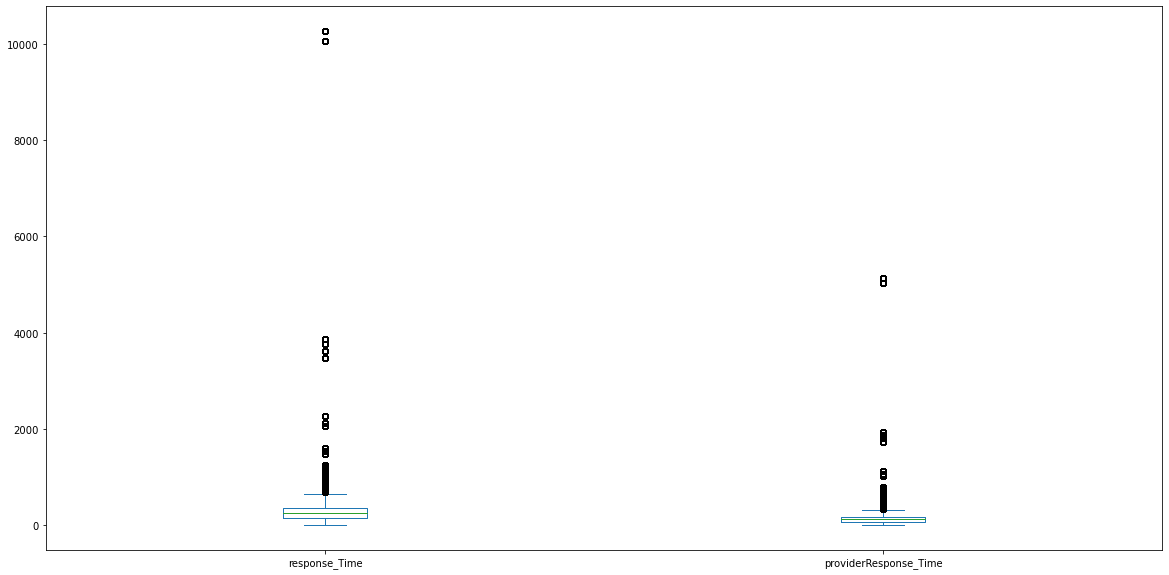

In [329]:
df.plot( kind = "box", figsize = (20,10))
plt.show()

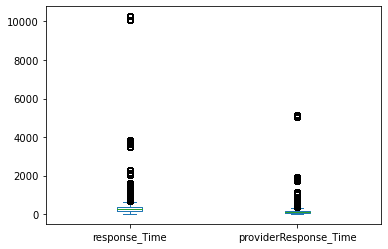

In [330]:
df[["response_Time","providerResponse_Time"]].plot( kind = "box")
plt.show()

In [331]:
Q1_providerRespone_Time = df["providerResponse_Time"].quantile(0.25)
Q3_providerRespone_Time = df["providerResponse_Time"].quantile(0.75)

LB_providerRespone_Time = Q1_providerRespone_Time - 1.5 * (Q3_providerRespone_Time - Q1_providerRespone_Time)
UB_providerRespone_Time = Q3_providerRespone_Time + 1.5 * (Q3_providerRespone_Time - Q1_providerRespone_Time)

print(f''' The lower bound for providerResponse_Time feature is {LB_providerRespone_Time}\n The higher bound for providerResponse_Time feature is {UB_providerRespone_Time}''')


 The lower bound for providerResponse_Time feature is -79.5
 The higher bound for providerResponse_Time feature is 332.5


In [332]:
Q1_response_Time = df["response_Time"].quantile(0.25)
Q3_response_Time = df["response_Time"].quantile(0.75)

LB_response_Time = Q1_response_Time - 1.5 * (Q3_response_Time - Q1_response_Time)
UB_response_Time = Q3_response_Time + 1.5 * (Q3_response_Time - Q1_response_Time)

print(f''' The lower bound for response_Time feature is {LB_response_Time}\n The higher bound for response_Time feature is {UB_response_Time}''')


 The lower bound for response_Time feature is -159.0
 The higher bound for response_Time feature is 665.0


### Explore important features

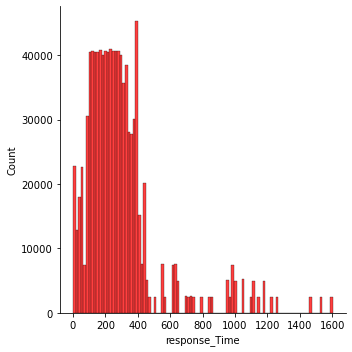

In [333]:
# Calculate the mean and standard deviation of column response_Time
mean_A = df['response_Time'].mean()
std_A = df['response_Time'].std()

# Find outliers greater than mean + 2 std and smaller than mean - 2 std
outliers = df.loc[(df['response_Time'] > mean_A + 2*std_A) | (df['response_Time'] < mean_A - 2*std_A), 'response_Time']

# Replace outliers with the mean value of column response_Time
for index in outliers.index:
    df.loc[index, 'response_Time'] = mean_A

sns.displot(df['response_Time'],color='red',bins=100)
plt.show()

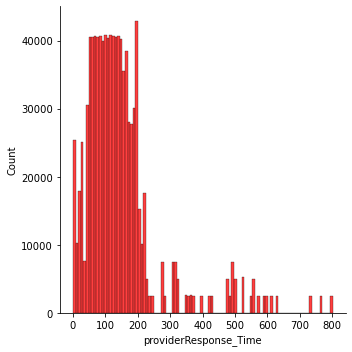

In [334]:
# Calculate the mean and standard deviation of column providerResponse_Time
mean_A = df['providerResponse_Time'].mean()
std_A = df['providerResponse_Time'].std()

# Find outliers greater than mean + 2 std and smaller than mean - 2 std
outliers = df.loc[(df['providerResponse_Time'] > mean_A + 2*std_A) | (df['providerResponse_Time'] < mean_A - 2*std_A), 'providerResponse_Time']

# Replace outliers with the mean value of column response_Time
for index in outliers.index:
    df.loc[index, 'providerResponse_Time'] = mean_A

sns.displot(df['providerResponse_Time'],color='red',bins=100)
plt.show()

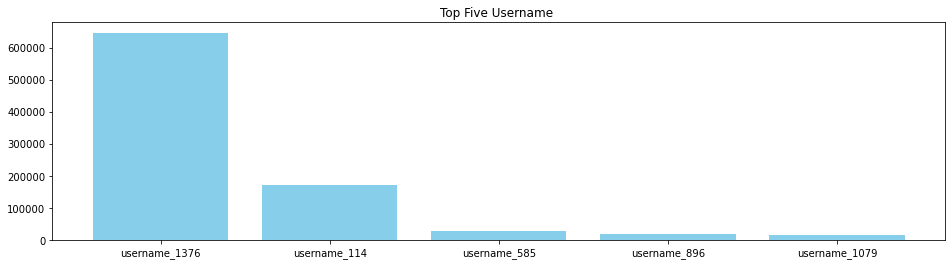

In [335]:
plt.figure(figsize=(16, 4))
plt.bar(df['username'].value_counts()[0:5].index,df['username'].value_counts()[0:5].values,color='skyblue')
plt.title("Top Five Username ")
plt.show()

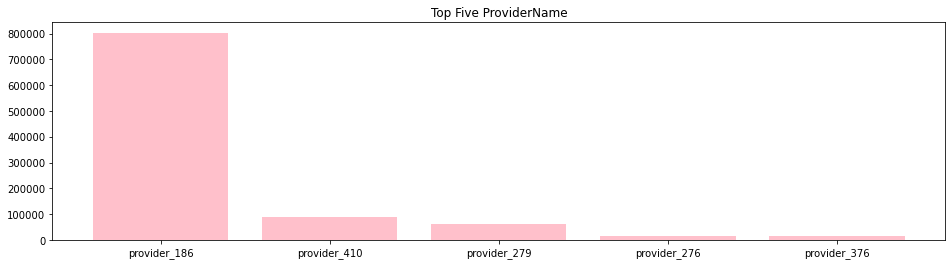

In [336]:
plt.figure(figsize=(16, 4))
plt.bar(df["providerName"].value_counts()[0:5].index,df["providerName"].value_counts()[0:5].values,color='pink')
plt.title("Top Five ProviderName")
plt.show()

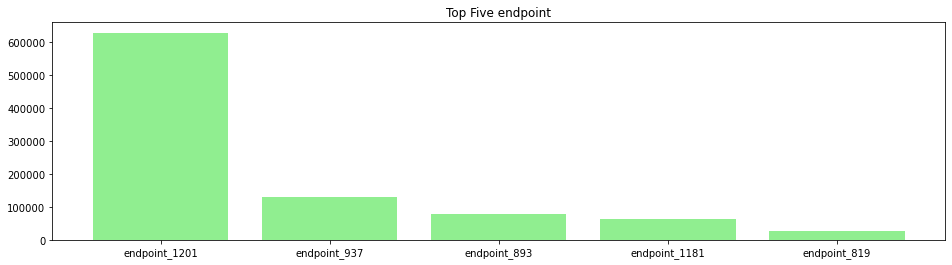

In [337]:
plt.figure(figsize=(16, 4))
plt.bar(df["endpoint"].value_counts()[0:5].index,df["endpoint"].value_counts()[0:5].values,color='lightgreen')
plt.title("Top Five endpoint")
plt.show()

In [338]:
def count_percentage_plot_by_column(column_name,color_name = 'aqua'):
    global available_colors
    global df
    if column_name not in df.columns.tolist():
        raise Exception(f"Column with name '{column_name}' doesnt exists.")
    # if color_name not in available_colors:
    #     raise Exception(f"Color with name '{color_name}' doesnt exists.")
    count_percentage = [ round(i,2) for i in df[column_name].value_counts().values / df.shape[0] * 100]
    uniques_values = df[column_name].value_counts().index
    result = pd.DataFrame(
        {
            column_name : uniques_values,
            "count_percentage" : count_percentage
        }
    )
    fig = px.bar(result, x = column_name, y = "count_percentage")
    fig.update_layout(autosize=False,
    width=400,
    height=400
    )
    fig.update_traces(marker=dict(color= color_name))
    fig.show()

In [339]:
# pie beshe
count_percentage_plot_by_column('log_level','aqua')

In [340]:
count_percentage_plot_by_column('method','olive')

In [341]:
# xticks problem
count_percentage_plot_by_column('Price','midnightblue')

In [342]:
count_percentage_plot_by_column('log_type','lightseagreen')

In [343]:
count_percentage_plot_by_column('planName','purple')

In [344]:
count_percentage_plot_by_column('call_type','turquoise')

In [345]:
count_percentage_plot_by_column('api_type','plum')

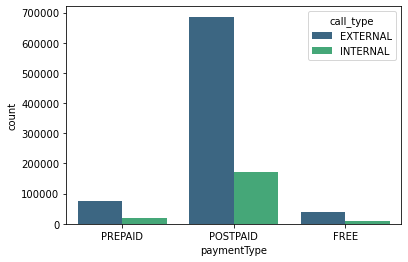

In [346]:
sns.countplot(x='paymentType',data=df,hue='call_type',palette='viridis')
plt.show()

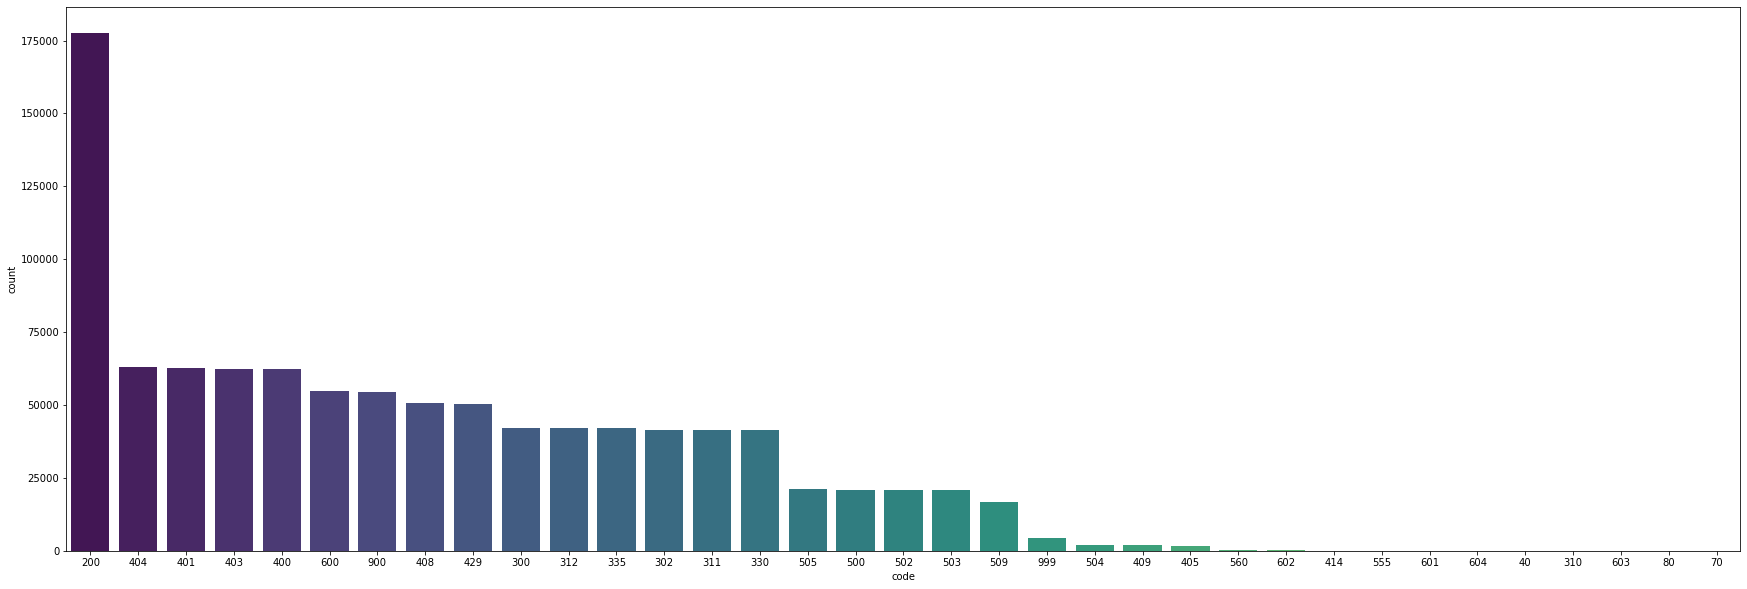

In [347]:
plt.figure(figsize=(30,10))
sns.countplot(x='code',data=df,palette='viridis',order=df['code'].value_counts().index)
plt.show()

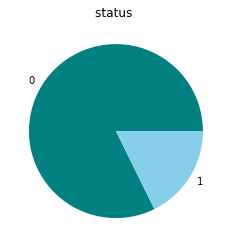

In [348]:
plt.figure(figsize=(6, 4))
plt.pie(df["status"].value_counts().values,labels=df["status"].value_counts().index,colors=['teal','skyblue'])
plt.title("status ")
plt.show()

## Feature Engineering and More Insight

### Latency

Latency means the diffrence between response_time and providerResponse_Time.

The latency shows the api management platfrom response time. 

In [349]:
df["latency"] = df["response_Time"]-df["providerResponse_Time"]

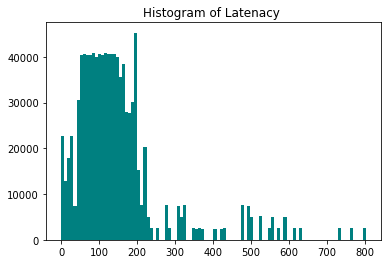

In [350]:
plt.hist(df["latency"],color='teal', bins = 100)
plt.title("Histogram of Latenacy ")
plt.show()

In [351]:
# ERROR AND GOLD PLAN
error_and_goldplan = round( df[(df["log_level"] == "ERROR") & (df["planName"] == "Gold")].shape[0],2)

In [352]:
# ALL GOLD PLAN
all_goldplan = df[(df["planName"] == "Gold")].shape[0]

We can see the percentage of failed transactions in Gold plan. It is almost 8%

In [353]:
round(error_and_goldplan / all_goldplan * 100,2)

8.27

Because of 92% of good performance in good plan, we can claim that the problem is from provider side and **not** from api management side.
Now let's check if we have a bad performer provider with huge amount of failed transaction who has a gold plan.

In [354]:
df[(df["log_level"] == "ERROR") & (df["planName"] == "Gold")]["providerName"].value_counts()

provider_186     13283
provider_410      1460
provider_279      1011
provider_276       275
provider_376       234
provider_189        72
provider_290        67
provider_1050       23
provider_562        19
provider_1189       18
provider_800        18
provider_715        12
provider_955        10
provider_89         10
provider_1386        8
provider_1226        6
provider_322         3
provider_457         2
provider_1421        1
Name: providerName, dtype: int64

The Worst one is **provider_186**, after it  provider_410, provider_279, provider_376 respectively. We should notif them to solve the problem.

### Dealing with Boolean and Numbers

In [355]:
df.dtypes

log_level                 object
code                      object
method                    object
username                  object
Price                     object
gwStatus                  object
planName                  object
received_at               object
log_type                  object
providerName              object
gatewayName               object
response_status           object
status                    object
response_Time            float64
paymentType               object
endpoint                  object
providerResponse_Time    float64
gwCode                    object
call_type                 object
api_type                  object
latency                  float64
dtype: object

These columns can be replace with boolian values:

 **log_level, method, planName, log_type, paymentType, call_type, api_type** 

 or in **planName** case they can encode with ordinary numbers like 1 2 3.

 **BUT** we keep them as they are, cause at the moment we dont have plan for any ML models.

In [356]:
df["code"] = df["code"].apply(lambda x : int(x))
df["Price"] = df["Price"].astype(int)
df["gwStatus"] = df["gwStatus"].astype(bool)
df["response_status"] = df["response_status"].astype(int)
df["status"] = df["status"].astype(bool)
df["gwCode"] = df["gwCode"].astype(int)

In [357]:
df.dtypes

log_level                 object
code                       int64
method                    object
username                  object
Price                      int64
gwStatus                    bool
planName                  object
received_at               object
log_type                  object
providerName              object
gatewayName               object
response_status            int64
status                      bool
response_Time            float64
paymentType               object
endpoint                  object
providerResponse_Time    float64
gwCode                     int64
call_type                 object
api_type                  object
latency                  float64
dtype: object

### Dealing with Date type

In [358]:
# Convert object type to datetime type
df["received_at"] = pd.to_datetime(df["received_at"], utc = True)

In [359]:
# Create some new columns from received_at column
df["received_at_short"] = df["received_at"].dt.date
df["Year"] = df["received_at"].dt.year
df["Month"] = df["received_at"].dt.month
df["Day"] = df["received_at"].dt.day
df['Day of Week'] = df['received_at'].apply(lambda time: time.dayofweek)
df['Hour'] = df['received_at'].apply(lambda time: time.hour)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

### Relations

In [360]:
df.columns

Index(['log_level', 'code', 'method', 'username', 'Price', 'gwStatus',
       'planName', 'received_at', 'log_type', 'providerName', 'gatewayName',
       'response_status', 'status', 'response_Time', 'paymentType', 'endpoint',
       'providerResponse_Time', 'gwCode', 'call_type', 'api_type', 'latency',
       'received_at_short', 'Year', 'Month', 'Day', 'Day of Week', 'Hour'],
      dtype='object')

In [361]:
df.drop(["gwStatus","status"], axis = 1).corr()

,code,Price,response_status,response_Time,providerResponse_Time,gwCode,latency,Year,Month,Day,Hour
code,1.000000,0.001966,0.000852,-0.000666,-0.000666,-0.001006,-0.000666,0.001168,-0.000031,0.000451,-0.000617
Price,0.001966,1.000000,0.001049,0.000970,0.000971,0.000193,0.000968,-0.000773,0.000412,0.000965,-0.001035
response_status,0.000852,0.001049,1.000000,0.000335,0.000333,0.000698,0.000337,-0.000844,0.000462,0.000358,0.000267
response_Time,-0.000666,0.000970,0.000335,1.000000,0.999998,-0.000189,0.999998,0.000175,0.000744,0.000533,-0.001157
providerResponse_Time,-0.000666,0.000971,0.000333,0.999998,1.000000,-0.000190,0.999992,0.000175,0.000744,0.000534,-0.001158
gwCode,-0.001006,0.000193,0.000698,-0.000189,-0.000190,1.000000,-0.000188,-0.000069,0.001233,0.000946,0.000310
latency,-0.000666,0.000968,0.000337,0.999998,0.999992,-0.000188,1.000000,0.000174,0.000745,0.000533,-0.001156
Year,0.001168,-0.000773,-0.000844,0.000175,0.000175,-0.000069,0.000174,1.000000,-0.436756,-0.057109,0.000771
Month,-0.000031,0.000412,0.000462,0.000744,0.000744,0.001233,0.000745,-0.436756,1.000000,0.005567,-0.001265
Day,0.000451,0.000965,0.000358,0.000533,0.000534,0.000946,0.000533,-0.057109,0.005567,1.000000,0.001273


Because this is the mock data and also a lot our features are categorical, we dont have any correlation between features.

In [362]:
#Grouping trasaction based on month for different codes
byMonth = df.groupby( by=['Month']).count().reset_index()
byMonth200 = df[df['code']==200].groupby('Month').count().reset_index()
byMontherror = df[df['code']!=200].groupby('Month').count().reset_index()
byMonth200.head()

,Month,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,...,providerResponse_Time,gwCode,call_type,api_type,latency,received_at_short,Year,Day,Day of Week,Hour
0,1,15399,15399,15399,15399,15399,15399,15399,15399,15399,...,15399,15399,15399,15399,15399,15399,15399,15399,15399,15399
1,2,14008,14008,14008,14008,14008,14008,14008,14008,14008,...,14008,14008,14008,14008,14008,14008,14008,14008,14008,14008
2,3,15710,15710,15710,15710,15710,15710,15710,15710,15710,...,15710,15710,15710,15710,15710,15710,15710,15710,15710,15710
3,4,14249,14249,14249,14249,14249,14249,14249,14249,14249,...,14249,14249,14249,14249,14249,14249,14249,14249,14249,14249
4,5,14621,14621,14621,14621,14621,14621,14621,14621,14621,...,14621,14621,14621,14621,14621,14621,14621,14621,14621,14621


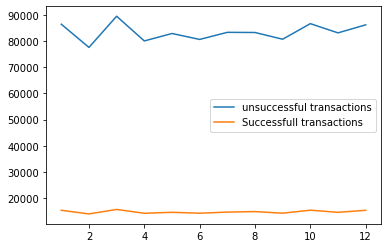

In [363]:
plt.plot(byMontherror['Month'], byMonth['code'], label = "unsuccessful transactions")
plt.plot(byMonth200['Month'], byMonth200['code'], label = "Successfull transactions")
plt.legend()
plt.show()

In [364]:
#Grouping trasaction based on hour of day and day of week
dayHour = df.groupby(by=['Day of Week','Hour']).count()['code'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,6050,5783,5959,6017,5953,6062,6039,6048,5983,6058,...,6053,5800,5950,5895,5913,5939,5910,6115,5930,5933
Mon,6061,5882,5879,5798,5940,5952,6078,5899,5942,5994,...,5796,5946,5778,6003,5926,5982,5909,5968,6005,5997
Sat,5866,5964,5914,6010,6116,5900,5968,6059,5978,6012,...,5931,5994,5891,5874,6063,6032,6053,5995,5879,5907
Sun,5895,5826,6020,6048,5985,5865,6006,5945,6032,6029,...,5957,5995,6088,6056,5899,5893,5953,5870,6059,5897
Thu,5942,5952,5931,5962,5981,5846,5846,5903,6008,5786,...,5877,6145,5898,5968,5901,5972,6057,5934,5959,6035


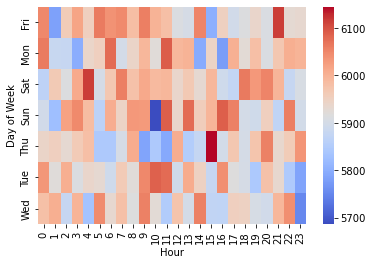

In [365]:
sns.heatmap(dayHour,cmap='coolwarm')
plt.show()

In [366]:
#Grouping trasaction based on month and day of week.
dayMonth = df.groupby(by=['Day of Week','Month']).count()['code'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9644,11441,12015,14660,9105,11883,12328,11241,14412,9813,11890,14752
Mon,14620,11774,12076,9145,14453,9288,11857,12519,11333,14084,10086,11505
Sat,12790,9217,12020,14016,10047,11322,14901,9098,11931,12732,11108,14109
Sun,14671,9569,12036,11242,15015,9095,14154,9677,11780,14706,9286,11879
Thu,9010,11837,14264,12420,8990,14027,9587,11749,12456,11713,11700,14648


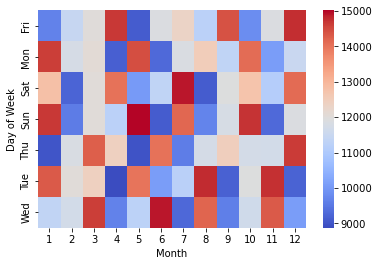

In [367]:
sns.heatmap(dayMonth,cmap='coolwarm')
plt.show()

### Loss Money For ERROR By Provider Name

In [368]:
def loss_money_by_provider(pname):
    if pname not in df["providerName"].unique():
        raise Exception(f"This provider name {pname} doesnt exists in provider names list.")
    lost_money = df[(df["log_level"] == "ERROR") & (df["providerName"] == pname)]["Price"].sum()
    fig = go.Figure()
    fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = lost_money,
    domain = {'row': 0, 'column': 1}))
    fig.update_layout(autosize=False,
    width=400,
    height=400,
        title={
        'text': f"Loss money for {pname}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    )
    fig.show()

In [369]:
loss_money_by_provider("provider_186")

Notify Providers who having Gold plan but *don't serve well*.